# $N_{\rm H}$ Distribution

This notebook looks at the distribution of hydrogen column density as a function of Seyfert Type to see if there is a link between the obscuration we're seeing with respect to the reduced broad line flux and the X-ra absorption.

In [28]:
# Standard module imports
import numpy as np
import pandas as pd

%matplotlib inline

In [29]:
# Setup figures and upload plotting modules
style='notebook'
execfile('/Users/ttshimiz/Dropbox/Research/figure_setup.py')

In [37]:
# Upload the sample data
bass_general = pd.read_csv('/Users/ttshimiz/Dropbox/Research/BASS/bass_general_dr1.csv', index_col=0, skiprows=[1])
df = pd.read_csv('../data/cleaned_sample.csv', index_col=0)
df_all = pd.read_csv('../data/cleaned_sample_all_seyferts.csv', index_col=0)

In [38]:
#ind_sy1 = (df['Type'] == 1) | (df['Type'] == 1.2)
#ind_sy1_9 = (df['Type'] == 1.9)
ind_sy1 = (df_all['Type'] == 1)
ind_sy1_2 = (df_all['Type'] == 1.2)
ind_sy1_5 = (df_all['Type'] == 1.5)
ind_sy1_9 = (df_all['Type'] == 1.9)
ind_sy2 = (df_all['Type'] == 2)

Now we can just plot the $N_{\rm H}$ distribution. We'll use the numpy.histogram function to determine the bin widths using the automatic method.

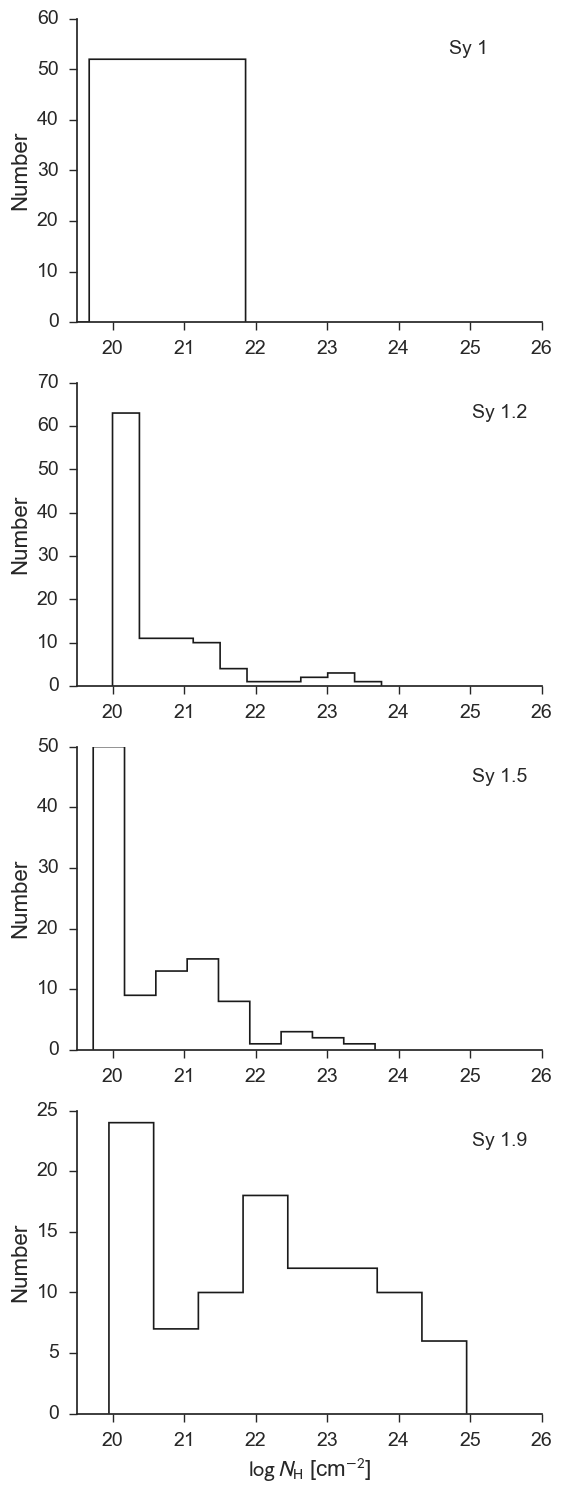

In [43]:
fig = plt.figure(figsize=(6, 18))

ax1= fig.add_subplot(411)
ax1.hist(df_all['NH'][ind_sy1], color='k', histtype='step', lw=1.2)
ax1.set_xlim(19.5, 26)
ax1.set_ylabel('Number')
ax1.text(0.8, 0.9, 'Sy 1', ha='left', va='center', fontsize=14, transform=ax1.transAxes)

ax2= fig.add_subplot(412, sharex=ax1)
ax2.hist(df_all['NH'][ind_sy1_2], bins='auto', color='k', histtype='step', lw=1.2)
ax2.set_xlim(19.5, 26)
ax2.set_ylabel('Number')
ax2.text(0.85, 0.9, 'Sy 1.2', ha='left', va='center', fontsize=14, transform=ax2.transAxes)

ax3= fig.add_subplot(413, sharex=ax1)
ax3.hist(df_all['NH'][ind_sy1_5].dropna(), bins='auto', color='k', histtype='step', lw=1.2)
ax3.set_xlim(19.5, 26)
ax3.set_ylabel('Number')
ax3.text(0.85, 0.9, 'Sy 1.5', ha='left', va='center', fontsize=14, transform=ax3.transAxes)

ax4= fig.add_subplot(414, sharex=ax1)
ax4.hist(df_all['NH'][ind_sy1_9].dropna(), bins='auto', color='k', histtype='step', lw=1.2)
ax4.set_xlim(19.5, 26)
ax4.set_ylabel('Number')
ax4.set_xlabel(r'$\log\,N_{\rm H}$ [cm$^{-2}$]')
ax4.text(0.85, 0.9, 'Sy 1.9', ha='left', va='center', fontsize=14, transform=ax4.transAxes)

sn.despine()
#fig.savefig('../figures/nh_hists_all_types.pdf', bbox_inches='tight')

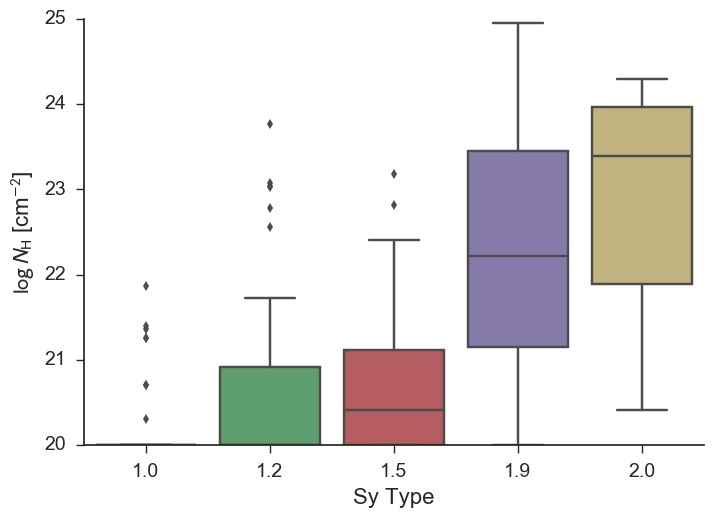

In [33]:
ax = sn.boxplot(x='Type', y='NH', data=df)
ax.set_xlabel('Sy Type')
ax.set_ylabel(r'$\log\,N_{\rm H}$ [cm$^{-2}$]')
sn.despine()
fig = plt.gcf()
fig.savefig('../figures/nh_boxplot.pdf', bbox_inches='tight')

In [34]:
# Let's look at the NH distribution within the Sy 1.9s for the ones on and off the broad H-alpha-X-ray relationship.
# The expectation is that they should have the same NH distribution.

# Set the broad H-alpha vs. X-ray relationship
slope = 1.08530371536
intercept = -5.27057849569
scatter = 0.411464318197

# Set how far below the broad H-alpha vs. X-ray relationship to choose Sy 1.9 AGN
offset = 2*scatter

# Pull out the Sy 1.9 that are offset
ind_sy1_9_halpha = df['Type'] == 1.9
ind_sy1_halpha = (df['Type'] == 1) | (df['Type'] == 1.2)
halpha_predict = np.log10(df['Intrinsic X-ray Luminosity'])*slope + intercept
diff_halpha = halpha_predict - np.log10(df['Broad Halpha Luminosity'])
off_srcs = diff_halpha > 2*scatter
on_srcs = diff_halpha < 2*scatter
#in_bw_srcs = ((diff_halpha > scatter) & (diff_halpha < 2*scatter))

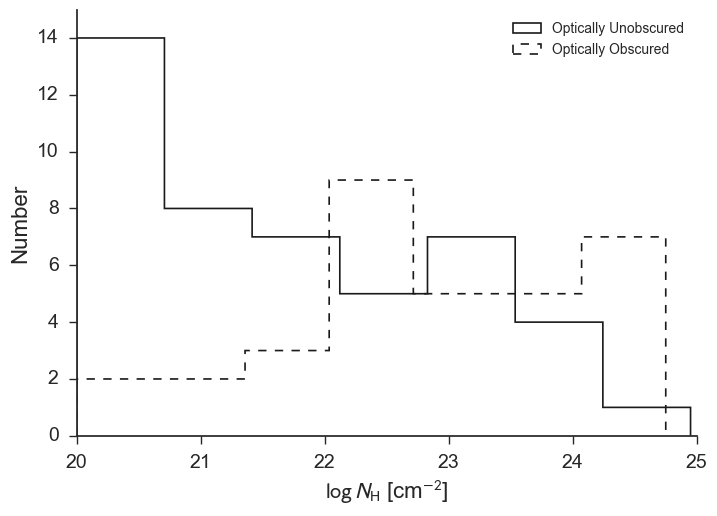

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['NH'][ind_sy1_9_halpha][on_srcs], bins='auto', color='k', histtype='step', lw=1.2)
ax.hist(df['NH'][ind_sy1_9_halpha][off_srcs], bins='auto', color='k', histtype='step', lw=1.2, ls='dashed')
#ax.hist(df['NH'][ind_sy1_9_halpha][in_bw_srcs], bins='auto', color='k', histtype='step', lw=1.2, ls='dotted')

#ax.hist(df_all['NH'][ind_sy1_9], bins='auto', color='r', histtype='step', lw=1.2)
ax.set_xlabel(r'$\log\,N_{\rm H}$ [cm$^{-2}$]')
ax.set_ylabel('Number')
ax.legend(['Optically Unobscured', 'Optically Obscured'], loc='upper right', fontsize=10)
ax.set_ylim(0, 15)
#ax.text(23, 37, 'Sy 1.9', ha='right' ,va='center')
sn.despine()

fig.savefig('../figures/nh_hists_sy1_9_split_optical_obscuration.pdf', bbox_inches='tight')

In [36]:
df[ind_sy1_9_halpha][off_srcs]

/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Broad Halpha Flux,Distance,Intrinsic 14-150 Flux,NH,Type,Intrinsic X-ray Luminosity,Broad Halpha Luminosity
1,9.522972,166.820,10.8,22.19,1.9,3.596845e+43,3.171542e+40
28,53.678584,97.070,45.7,23.50,1.9,5.153330e+43,6.053030e+40
33,110.242162,65.680,139.3,23.12,1.9,7.191494e+43,5.691356e+40
58,133.190676,47.480,67.0,24.33,1.9,1.807582e+43,3.593329e+40
79,8.448860,172.560,11.7,23.30,1.9,4.169345e+43,3.010787e+40
131,46.895387,72.940,20.7,23.87,1.9,1.317964e+43,2.985818e+40
150,47.597511,93.940,17.7,22.46,1.9,1.869287e+43,5.026747e+40
199,25.187739,503.040,19.3,24.17,1.9,5.844725e+44,7.627741e+41
239,40.483227,69.010,16.6,23.78,1.9,9.460930e+42,2.307283e+40
395,42.519322,232.210,12.0,20.00,1.9,7.743634e+43,2.743784e+41
